In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set up the plotting environment
sns.set(style="whitegrid")

In [2]:
# Load the dataset
file_path = 'D:\\INTERNSHIP\\Project2\\Crop Production data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [4]:
data.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [5]:
# Display the first few rows of the dataset
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [6]:
#Getting the unique categorical values
for i in data.columns:
    if(data[i].dtypes=='object'):
        print("Unique Values of ",i)
        print(data[i].unique())
    

Unique Values of  State_Name
['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']
Unique Values of  District_Name
['NICOBARS' 'NORTH AND MIDDLE ANDAMAN' 'SOUTH ANDAMANS' 'ANANTAPUR'
 'CHITTOOR' 'EAST GODAVARI' 'GUNTUR' 'KADAPA' 'KRISHNA' 'KURNOOL'
 'PRAKASAM' 'SPSR NELLORE' 'SRIKAKULAM' 'VISAKHAPATANAM' 'VIZIANAGARAM'
 'WEST GODAVARI' 'ANJAW' 'CHANGLANG' 'DIBANG VALLEY' 'EAST KAMENG'
 'EAST SIANG' 'KURUNG KUMEY' 'LOHIT' 'LONGDING' 'LOWER DIBANG VALLEY'
 'LOWER SUBANSIRI' 'NAMSAI' 'PAPUM PARE' 'TAWANG' 'TIRAP' 'UPPER SIANG'
 'UPPER SUBANSIRI' 'WEST KAMENG' 'WEST SIANG' 'BAKSA' 'BARPETA'
 'BONGAIGAO

In [7]:
data.isna().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [8]:
data['Production'].fillna(data['Production'].mean(),inplace=True)

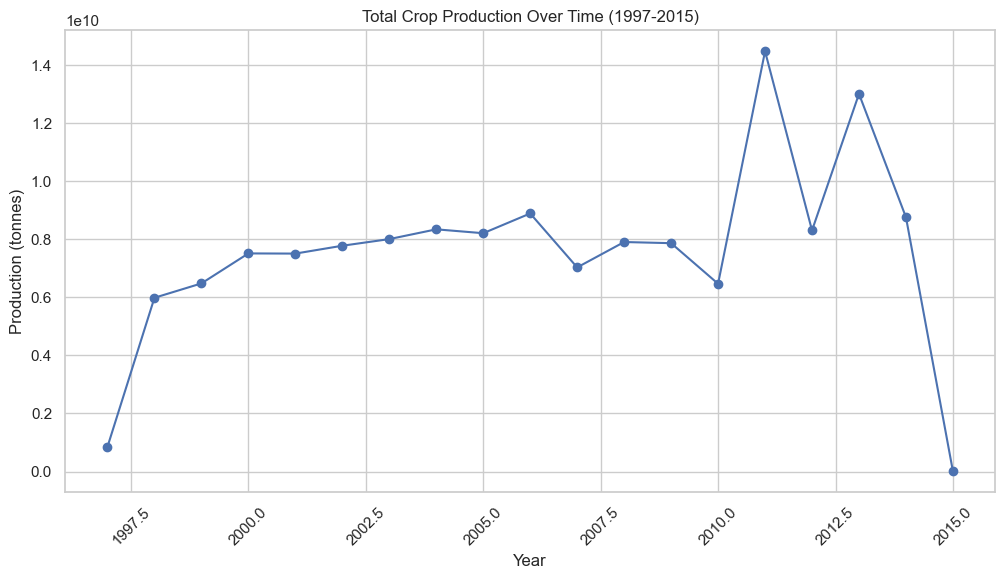

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Total Crop Production Over Time
crop_production_year = data.groupby('Crop_Year')['Production'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(crop_production_year['Crop_Year'], crop_production_year['Production'], marker='o')
plt.title('Total Crop Production Over Time (1997-2015)')
plt.xlabel('Year')
plt.ylabel('Production (tonnes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


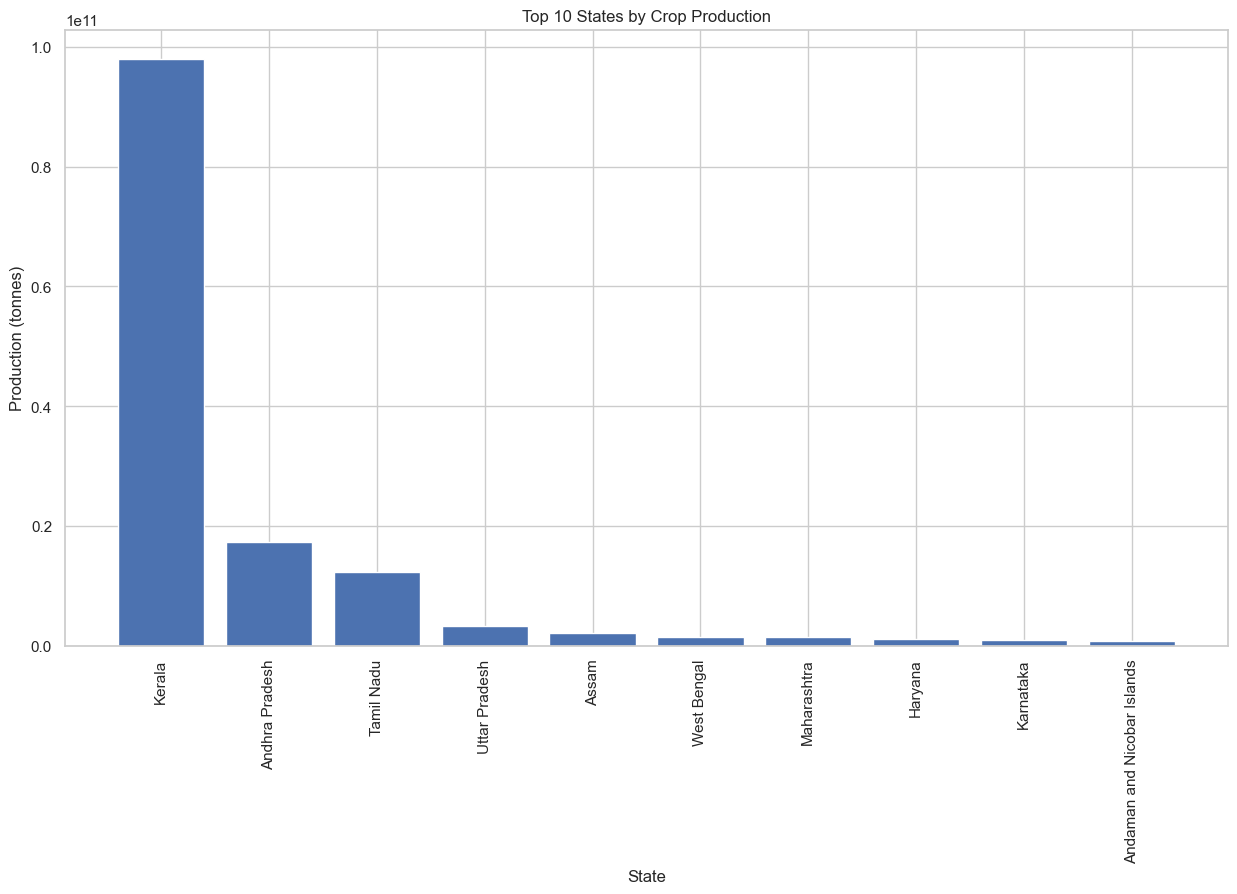

In [10]:
# Top 10 States by Production
top_states = data.groupby('State_Name')['Production'].sum().nlargest(10).reset_index()
plt.figure(figsize=(15, 8))
plt.bar(top_states['State_Name'], top_states['Production'])
plt.title('Top 10 States by Crop Production')
plt.xlabel('State')
plt.ylabel('Production (tonnes)')
plt.xticks(rotation=90)
plt.show()


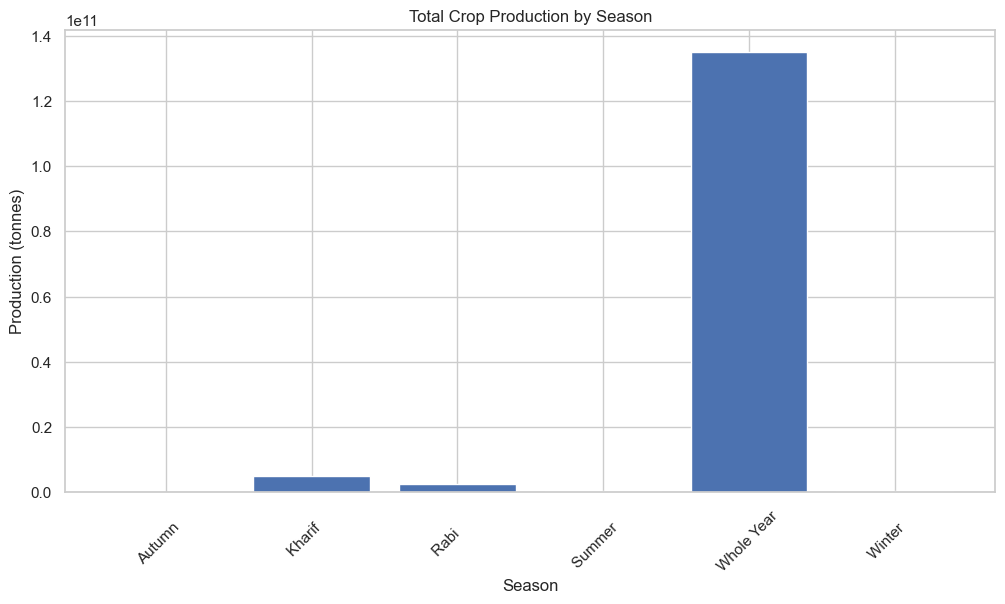

In [11]:
# Total Production by Season
seasonal_production = data.groupby('Season')['Production'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(seasonal_production['Season'], seasonal_production['Production'])
plt.title('Total Crop Production by Season')
plt.xlabel('Season')
plt.ylabel('Production (tonnes)')
plt.xticks(rotation=45)
plt.show()


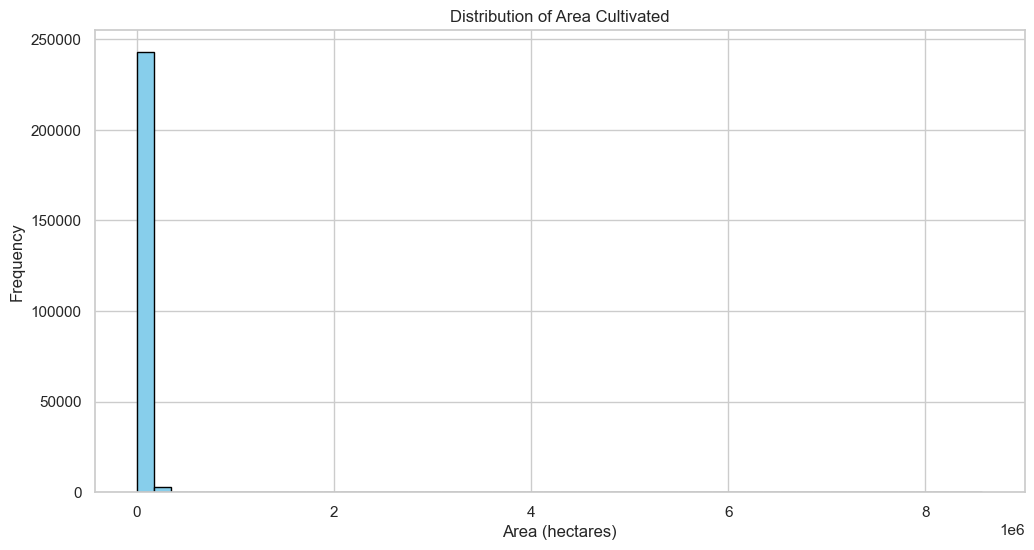

In [12]:
# Distribution of Area Cultivated
plt.figure(figsize=(12, 6))
plt.hist(data['Area'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Area Cultivated')
plt.xlabel('Area (hectares)')
plt.ylabel('Frequency')
plt.show()


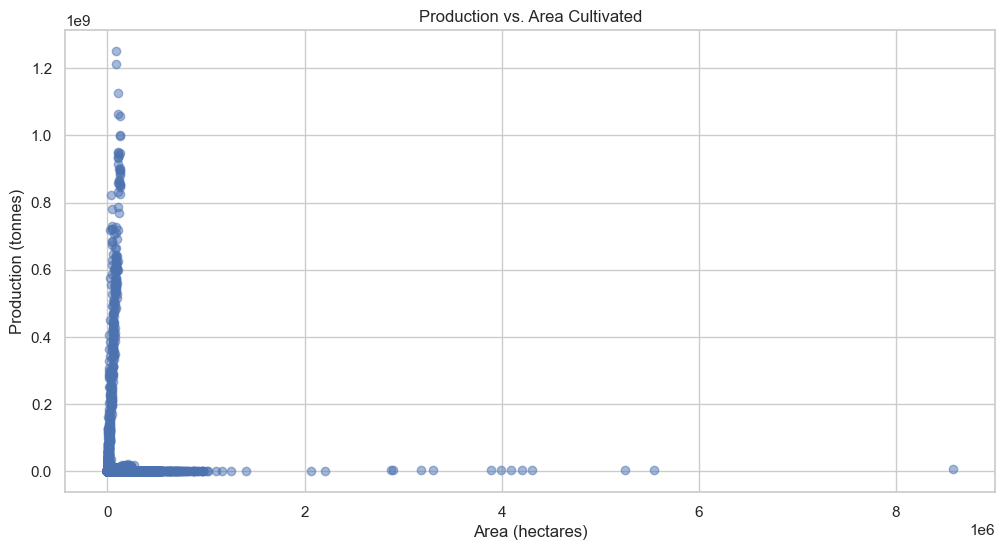

In [13]:
# Production vs. Area
plt.figure(figsize=(12, 6))
plt.scatter(data['Area'], data['Production'], alpha=0.5)
plt.title('Production vs. Area Cultivated')
plt.xlabel('Area (hectares)')
plt.ylabel('Production (tonnes)')
plt.show()


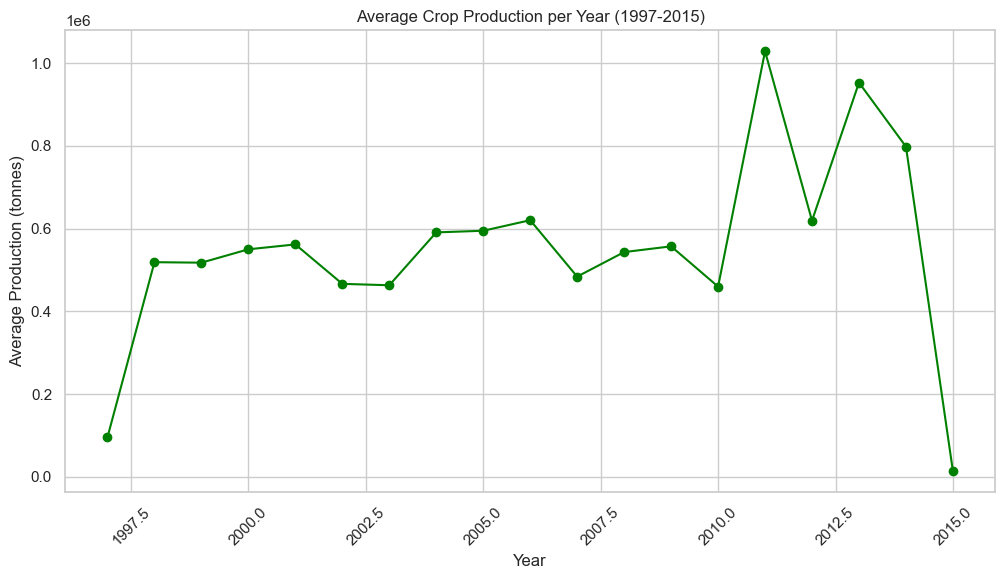

In [14]:
# Average Production per Year
average_production_year = data.groupby('Crop_Year')['Production'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(average_production_year['Crop_Year'], average_production_year['Production'], marker='o', color='green')
plt.title('Average Crop Production per Year (1997-2015)')
plt.xlabel('Year')
plt.ylabel('Average Production (tonnes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


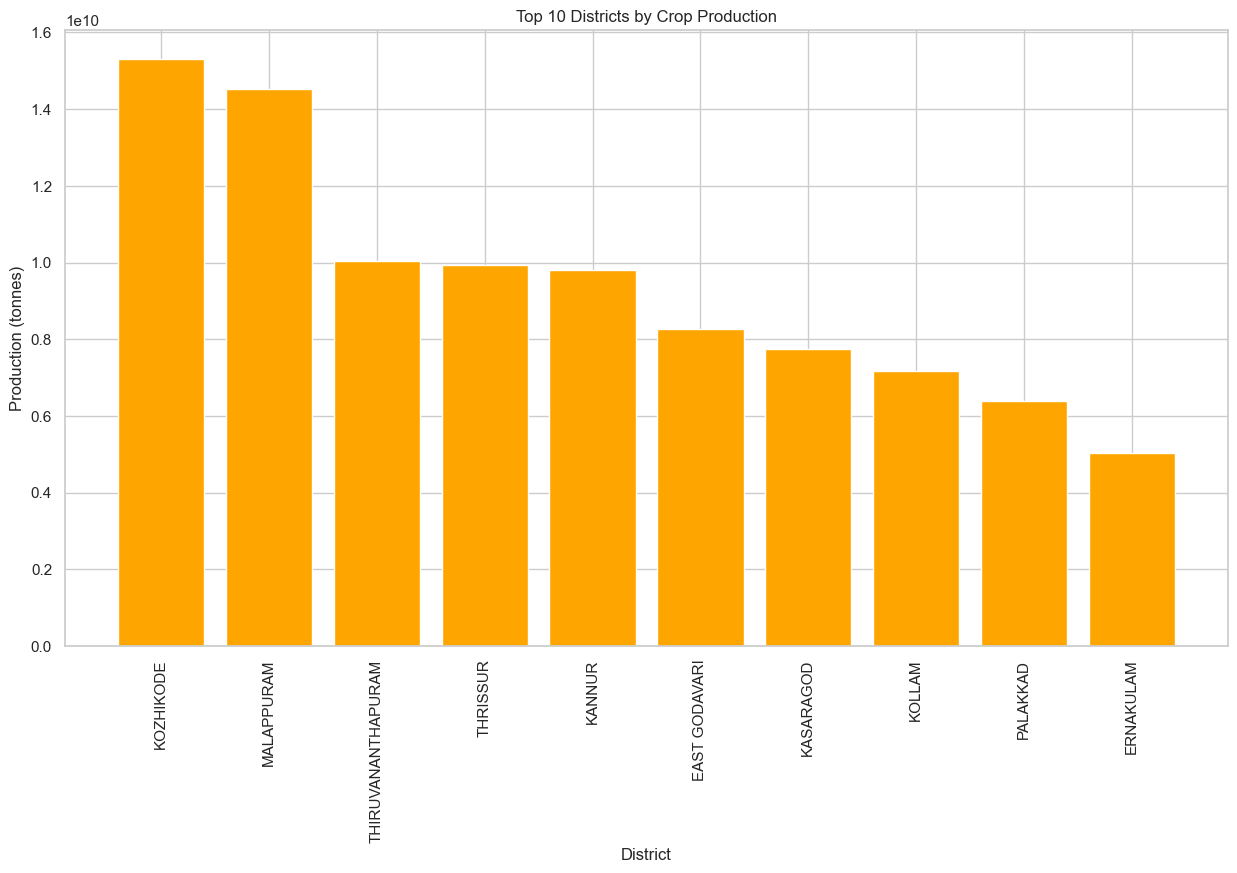

In [15]:
# Top 10 Districts by Production
top_districts = data.groupby('District_Name')['Production'].sum().nlargest(10).reset_index()
plt.figure(figsize=(15, 8))
plt.bar(top_districts['District_Name'], top_districts['Production'], color='orange')
plt.title('Top 10 Districts by Crop Production')
plt.xlabel('District')
plt.ylabel('Production (tonnes)')
plt.xticks(rotation=90)
plt.show()


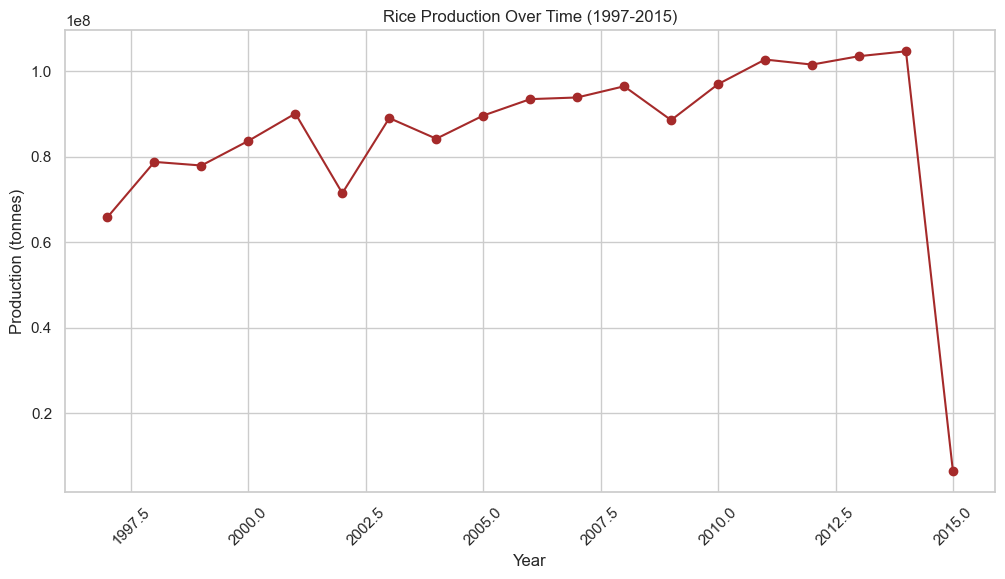

In [16]:
# Production of Rice Over Time
rice_production_year = data[data['Crop'] == 'Rice'].groupby('Crop_Year')['Production'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(rice_production_year['Crop_Year'], rice_production_year['Production'], marker='o', color='brown')
plt.title('Rice Production Over Time (1997-2015)')
plt.xlabel('Year')
plt.ylabel('Production (tonnes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


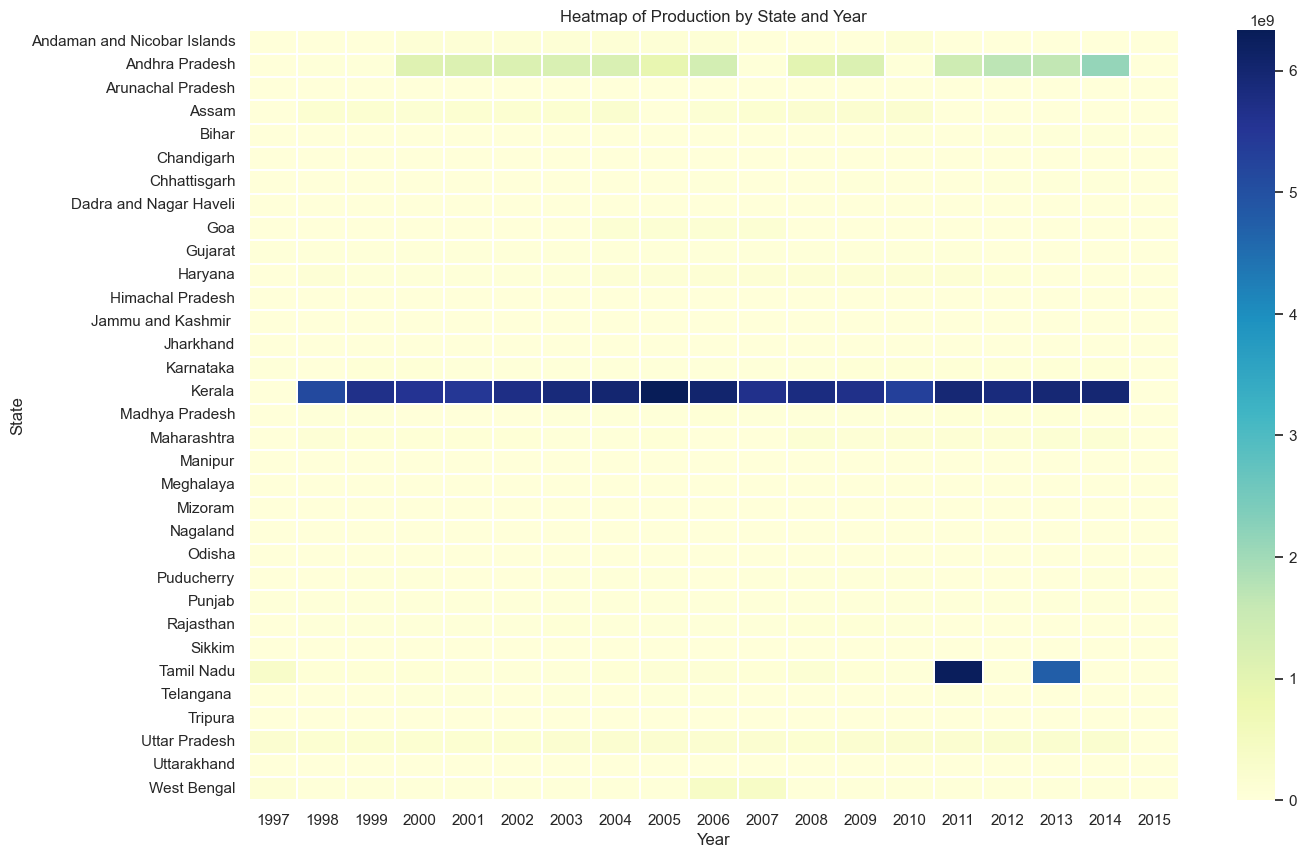

In [17]:
import seaborn as sns

# Pivot table for heatmap
heatmap_data = data.pivot_table(values='Production', index='State_Name', columns='Crop_Year', aggfunc='sum').fillna(0)
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu', linecolor='white', linewidths=0.1)
plt.title('Heatmap of Production by State and Year')
plt.xlabel('Year')
plt.ylabel('State')
plt.show()


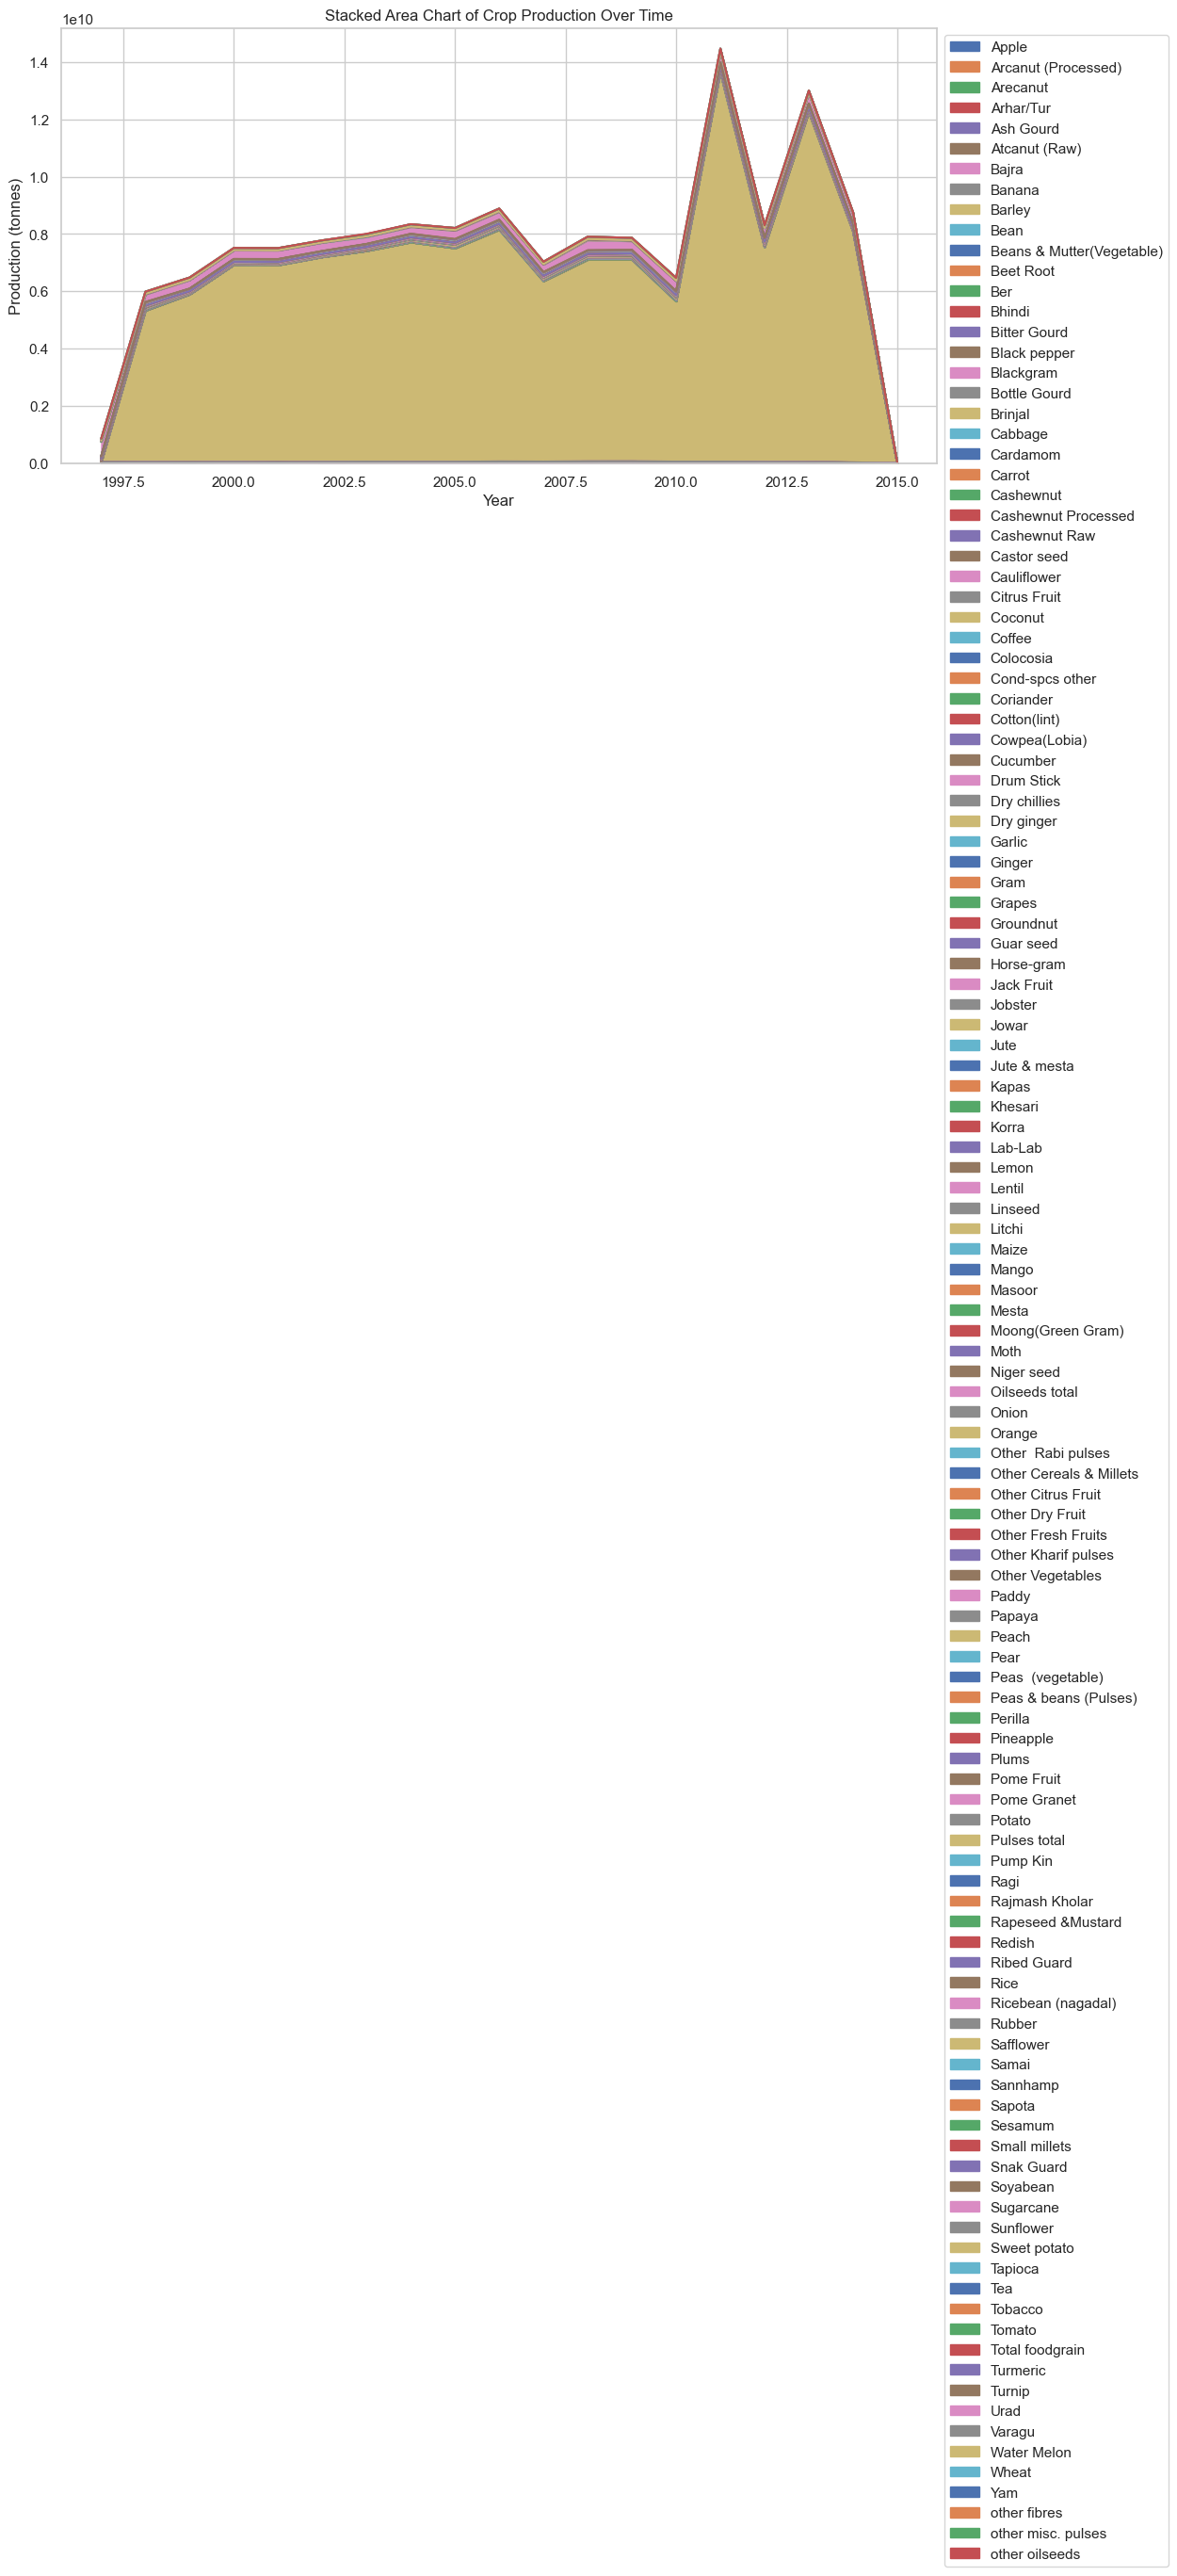

In [18]:

# Group data by year and crop, then sum production
area_data = data.groupby(['Crop_Year', 'Crop'])['Production'].sum().unstack().fillna(0)

# Plot
area_data.plot(kind='area', stacked=True, figsize=(12, 6))
plt.title('Stacked Area Chart of Crop Production Over Time')
plt.xlabel('Year')
plt.ylabel('Production (tonnes)')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

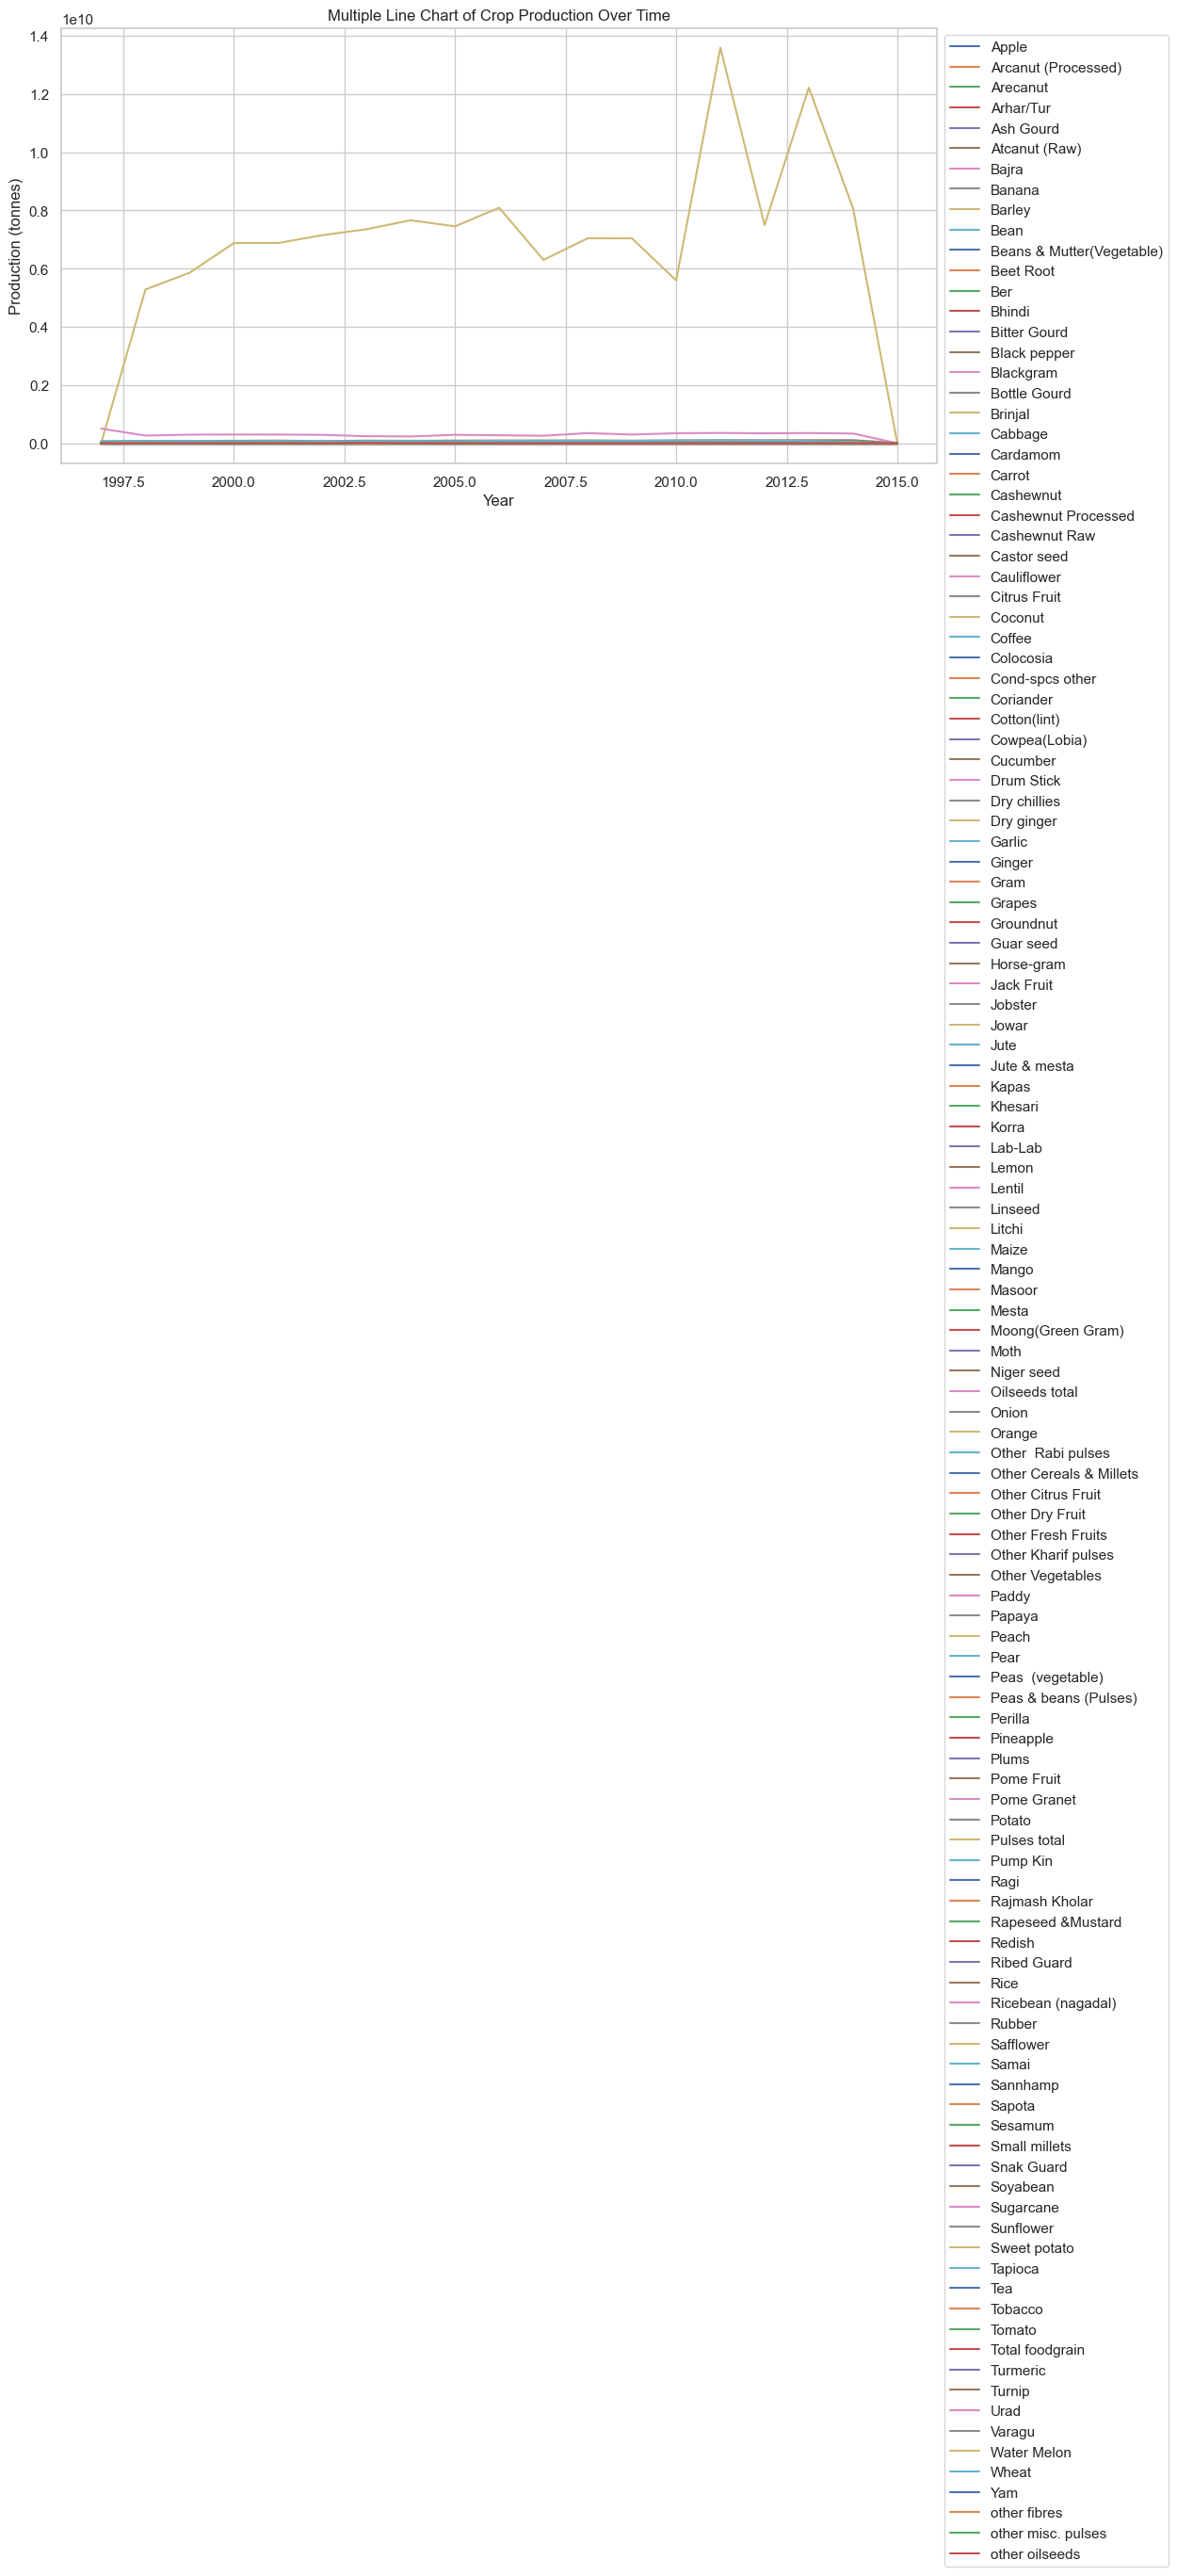

In [19]:
area_data.plot(kind='line', figsize=(12, 6))
plt.title('Multiple Line Chart of Crop Production Over Time')
plt.xlabel('Year')
plt.ylabel('Production (tonnes)')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

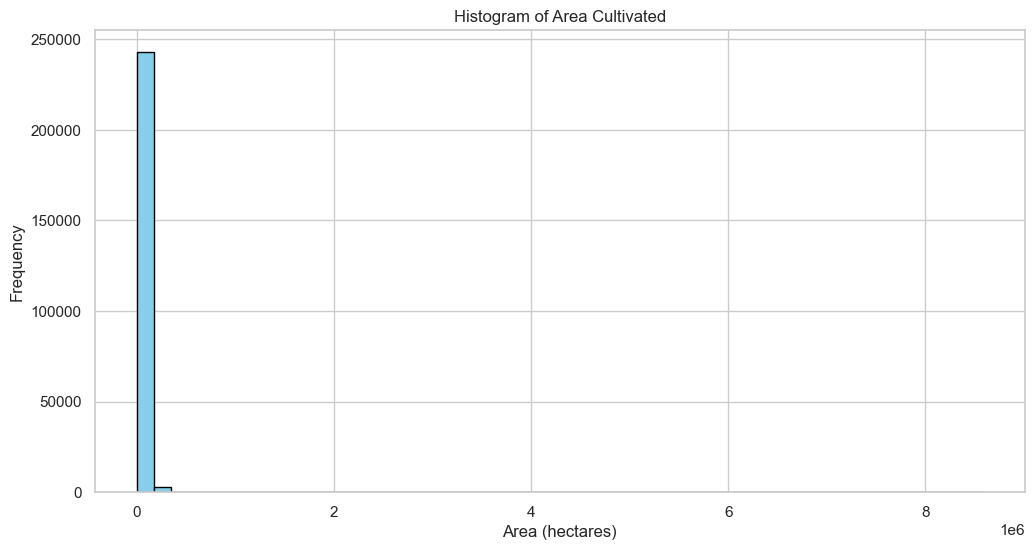

In [20]:

# Histogram for Area
plt.figure(figsize=(12, 6))
plt.hist(data['Area'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Area Cultivated')
plt.xlabel('Area (hectares)')
plt.ylabel('Frequency')
plt.show()


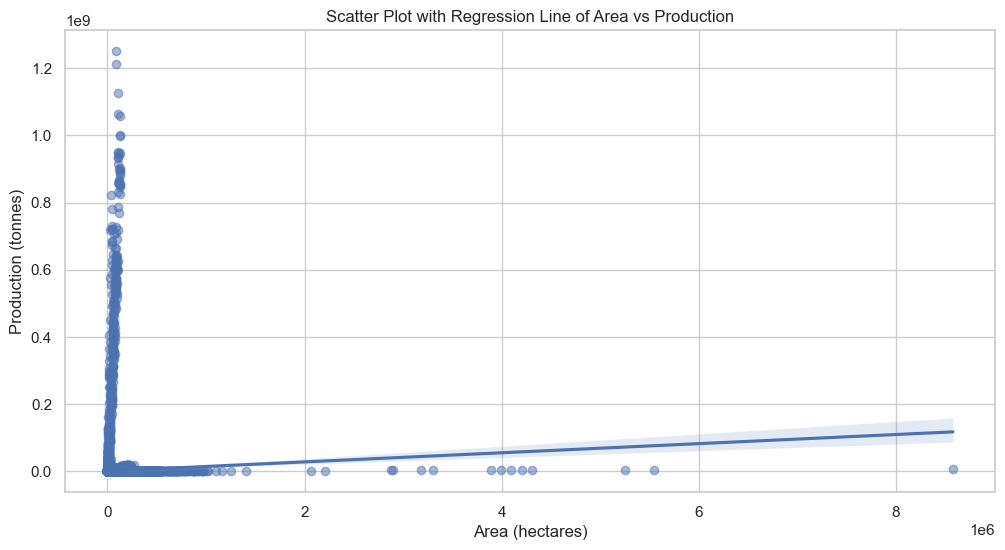

In [21]:

# Scatter plot with regression line for Area vs Production
plt.figure(figsize=(12, 6))
sns.regplot(x='Area', y='Production', data=data, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot with Regression Line of Area vs Production')
plt.xlabel('Area (hectares)')
plt.ylabel('Production (tonnes)')
plt.show()
